In [1080]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix #evaluation metric (Log.R)
from sklearn.metrics import mean_squared_error, r2_score #r2 score and mean squared for evaluation(Lin.R)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #Train Test Split cv
from sklearn.model_selection import KFold #KFold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score #cross validation metrics 
from sklearn.model_selection import cross_val_predict #cross validation metrics

from sklearn.cluster import KMeans # k-means
from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering

from sklearn.metrics import silhouette_score #silhouette score for clustering

from sklearn import metrics 

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

# Project 2

**this is NOT a group project**

So far in this course we have covered both *supervised* and *unsupervised* algorithms. Supervised algorithms *predict* a known outcome (either a continuous value like linear regression, or a categorical outcome like logistic regression, naive bayes, k-nearest neighbors, or decision trees), while unsupervised algorithms attempt to find structure in the data without a known outcome (like k-means, Gaussian Mixture Models (EM), or hierarchical agglomeretive clustering).

This project will use both, as well as compare the two. **You should write this project as if you're a data scientist who is presenting these results to people who are NOT data scientists**. You must put the answers the the questions (a-g/h) in a markdown cell and clearly indicate where you are answering each question.


## 1. Burgers or Pizza?

Using the dataset [*burgersOrPizza.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burgersOrPizza.csv), build 2 different models (each using a DIFFERENT algorithm, i.e. you cannot build two logistic regressions) that **predict whether or not a food item is a burger, or pizza**$^{[1]}$. 

**a)** explain which 2 algorithms you chose to use and why (including details like hyperparameters like k, max_depth...etc)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** choose ONE method of model validation, and explain why ( you must use the same method for both models; also, your reason must be based on aspects of the data and/or computational time/efficiency, and not on your lack of familiarity with the different methods).

**e)** explain how your model performed, and what metric you used to decide that.

**f)** compare the models: did one model do better than the other? Why do you think that was?

**g)** use ggplot to build at least 1 graph to help support your answers, and write a caption for this graph.




$^{[1]}$ The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

# 2. Donuts

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv) **build 2 clustering models** (using 2 different clustering algorithms)$^{[1]}$.

**a)** explain which 2 algorithms you chose to use and why (including which distance metrics you chose, similarity metrics..etc if applicable and why)

**b)** explain which variables you chose to include and why (you must use the same predictors for both models)

**c)** explain whether or not you decided to z-score your variables and why.

**d)** use silhouette scores to choose the number of clusters. Is the number of clusters the same for both of your models?

**e)** explain how your models performed, and what metric you used to decide that.

**f)** compare the models: how similar were the clusters between the two models?

**g)** use ggplot to build a graph that helps demonstrate your point for part f, and write a caption for this graph.

**h)** for both models, plot the clusters with ggplot and describe each cluster (using bullet points). Talk about what characterizes each cluster (e.g. which variables that cluster is high/low in), and give a general descriptor for the cluster (e.g. "these donuts are likely seasonal donuts" or "these are healthy and/or gluten free donuts" etc...)

$^{[1]}$ The columns with `_100g` at the end represent the amount of that nutrient per 100 grams of the food. For example, `Total_Fat` tells you the total amount of fat in that food, whereas `Total_Fat_100g` tells you how much fat there is per 100 grams of that food.

## 1. Burgers or Pizza? ##

We are looking to predict whether or not a food item is a burger, or a pizza.

#### Let's Look at Our Data ####

In [1081]:
burger = pd.read_csv('/Users/christophergaldi/CPSC392Midterm/burgersOrPizza.csv')

burger.Food_Category[burger.Food_Category == "Pizza"] = 0
burger.Food_Category[burger.Food_Category == "Burgers"] = 1
#burger.Food_Category[burger.Food_Category == "Pizza"] = 1

burger.head() #load data in

,Item_Name,Item_Description,Food_Category,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Chicken n Cheese Slider,Chicken n Cheese Slider on Mini Bun w/ Chicken...,1,290.0,12.0,3.5,0.0,25.0,720.0,NaN,...,12,4,0.0,25,727,NaN,30,15,1.0,1.0
1,Corned Beef n Cheese Slider,Corned Beef n Cheese Slider on Mini Bun w/ Cor...,1,220.0,9.0,3.5,0.0,30.0,890.0,NaN,...,10,4,0.0,33,978,NaN,23,15,1.0,1.0
2,Ham n Cheese Slider,Ham n Cheese Slider on Mini Bun w/ Roast Ham &...,1,230.0,9.0,3.5,0.0,30.0,750.0,NaN,...,10,4,0.0,33,824,NaN,24,14,3.0,1.0
3,Jalapeno Roast Beef n Cheese Slider,Jalapeno Roast Beef n Cheese Slider on Mini Bu...,1,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,11,5,0.0,31,684,NaN,21,14,1.0,1.0
4,Roast Beef n Cheese Slider,Roast Beef n Cheese Slider on Mini Bun w/ Roas...,1,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,12,5,0.0,33,736,NaN,23,15,1.0,1.0


In [1082]:
burger['Food_Category'] = burger.Food_Category.astype(int)

In [1083]:
burger.dtypes

Item_Name              object
Item_Description       object
Food_Category           int64
Calories              float64
Total_Fat             float64
Saturated_Fat         float64
Trans_Fat             float64
Cholesterol           float64
Sodium                float64
Potassium             float64
Carbohydrates         float64
Protein               float64
Sugar                 float64
Dietary_Fiber         float64
Calories_100g           int64
Total_Fat_100g          int64
Saturated_Fat_100g      int64
Trans_Fat_100g        float64
Cholesterol_100g        int64
Sodium_100g             int64
Potassium_100g        float64
Carbohydrates_100g      int64
Protein_100g            int64
Sugar_100g            float64
Dietary_Fiber_100g    float64
dtype: object

In [1084]:
burger.shape

(927, 25)

In [1085]:
burger.columns

Index(['Item_Name', 'Item_Description', 'Food_Category', 'Calories',
       'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Potassium', 'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber',
       'Calories_100g', 'Total_Fat_100g', 'Saturated_Fat_100g',
       'Trans_Fat_100g', 'Cholesterol_100g', 'Sodium_100g', 'Potassium_100g',
       'Carbohydrates_100g', 'Protein_100g', 'Sugar_100g',
       'Dietary_Fiber_100g'],
      dtype='object')

In [1086]:
burger.isnull().sum(axis = 0)

Item_Name               0
Item_Description        0
Food_Category           0
Calories                0
Total_Fat               0
Saturated_Fat           0
Trans_Fat              30
Cholesterol             0
Sodium                  0
Potassium             908
Carbohydrates           0
Protein                 0
Sugar                   4
Dietary_Fiber          28
Calories_100g           0
Total_Fat_100g          0
Saturated_Fat_100g      0
Trans_Fat_100g         30
Cholesterol_100g        0
Sodium_100g             0
Potassium_100g        908
Carbohydrates_100g      0
Protein_100g            0
Sugar_100g              4
Dietary_Fiber_100g     28
dtype: int64

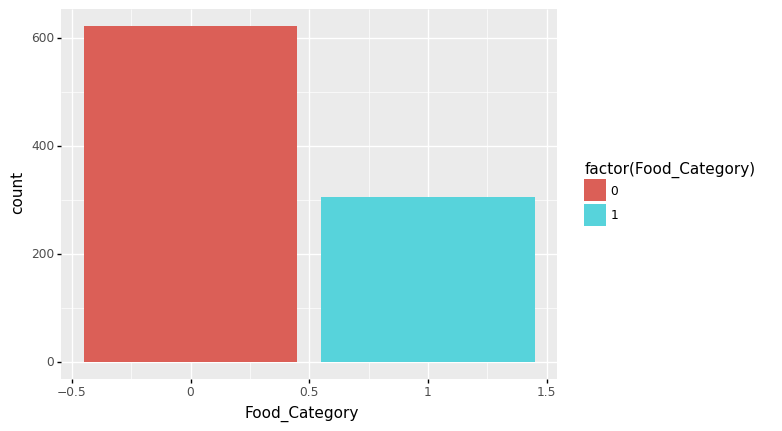

<ggplot: (8789590678547)>

In [1087]:
ggplot(burger, aes(x = "Food_Category")) + geom_bar(aes(fill = "factor(Food_Category)"))

This ggplot was used to look at the count of pizza and burgers, which I wanted to make sure was working after switching the int type and setting it to 1 and 0. 

In [1088]:
#foodCategory = burger.Food_Category[burger.Food_Category == 'Burgers'] = "0"
#foodCategory = burger.Food_Category[burger.Food_Category == 'Pizza'] = "1"

#burger.head()

In [1089]:
#an attempt to set the column up as ones and zeros because you can't take in strings (pizza or burgers) in lr

#predictors = ["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]

#foodCategory = burger.Food_Category[burger.Food_Category == 'Burgers'] = '0'
#foodCategory = burger.Food_Category[burger.Food_Category == 'Pizza'] = '1'

#X_train, X_test, y_train, y_test = train_test_split(burger[predictors], burger["Food_Category"], test_size = 0.4)
#X_train.head()

#continuous = ["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]
#z = StandardScaler()

#z.fit(X_train[continuous])

#X_train[continuous] = z.transform(X_train[continuous])

#myLogit = LogisticRegression()

#myLogit.fit(X_train, y_train)

#I tried to get it to work and I couldn't get it to predict it on Food_Category, 
#so whether they are a burger or not. keep getting the error that says solver needs 
#samples of at least 2 classes in the data, but it only has one class, 0, despite 
#attempting to turn it into an int to count it as two classes and overall trying to 
#figure it out but I wasn't able to. I took the extra day to try to get a fresh look 
#at it and try to see if i could figure it out but im stuck. This was the error I predominantly
#got ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'Burgers'
#also got the error: Unknown: Label type is unknown ; 
#And: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [1090]:
#kf = KFold(n_splits = 15)
#zScore = StandardScaler()
#zScore.fit(burger[["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]])

#z = zScore.transform(burger[["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]])

#burger[["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]] = z
#burger.head()

In [1091]:
#predictors = ["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]
#x = burger[["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates"]]
#y = burger["Food_Category"]


#kf.split(x)

#lr = LogisticRegression()

#acc = []

In [1092]:
#for train_indices, test_indices in kf.split(x): 
    #x_train = x.iloc[train_indices]
    #x_test = x.iloc[test_indices]
    #y_train = y.iloc[train_indices]
    #y_test = y.iloc[test_indices]
    
   # model = lr.fit(x_train, y_train) 
    
    #acc.append(accuracy_score(y_test, model.predict(x_test)))
    
#print(acc)
#np.mean(acc)

In [1093]:
predictors = ["Calories","Total_Fat", "Cholesterol", "Sodium", "Carbohydrates", "Protein", "Calories_100g", "Total_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g"]

X_train, X_test, y_train, y_test = train_test_split(burger[predictors], burger["Food_Category"], test_size = 0.2)
X_train.head()

continuous = ["Calories","Total_Fat", "Cholesterol", "Sodium", "Carbohydrates", "Protein", "Calories_100g", "Total_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g"]

z = StandardScaler()

z.fit(X_train[continuous])

X_train[continuous] = z.transform(X_train[continuous])

In [1094]:
myLogit = LogisticRegression()

In [1095]:
myLogit.fit(X_train, y_train)

LogisticRegression()

In [1096]:
predictedVals = myLogit.predict(X_test)

In [1097]:
accuracy_score(y_test, predictedVals)

0.7096774193548387

In [1098]:
coef = pd.DataFrame({"Coefficients" : myLogit.coef_[0], "Predictors" : predictors})
coef = coef.append({"Coefficients" : myLogit.intercept_[0], "Predictors" : "intercept"}, ignore_index = True)
coef

,Coefficients,Predictors
0,0.317463,Calories
1,2.054560,Total_Fat
2,1.017956,Cholesterol
3,-0.684421,Sodium
4,-0.001506,Carbohydrates
5,-1.188389,Protein
6,-1.709951,Calories_100g
7,1.345622,Total_Fat_100g
8,-0.296801,Cholesterol_100g
9,-0.691968,Sodium_100g


In [1099]:
coef["Odds Coefficient"] = np.exp(coef["Coefficients"])
coef

,Coefficients,Predictors,Odds Coefficient
0,0.317463,Calories,1.373638
1,2.054560,Total_Fat,7.803401
2,1.017956,Cholesterol,2.767532
3,-0.684421,Sodium,0.504382
4,-0.001506,Carbohydrates,0.998495
5,-1.188389,Protein,0.304712
6,-1.709951,Calories_100g,0.180875
7,1.345622,Total_Fat_100g,3.840574
8,-0.296801,Cholesterol_100g,0.743192
9,-0.691968,Sodium_100g,0.500590


In [1100]:
accuracy_score(y_test, predictedVals) #accuracy

0.7096774193548387

In [1101]:
confusion_matrix(y_test, predictedVals) #confusion matrix

array([[132,   0],
       [ 54,   0]])

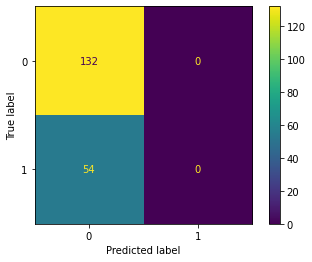

In [1102]:
plot_confusion_matrix(myLogit, X_test, y_test)

#### Let's Look at our Data Again ####

In [1103]:
pizza = pd.read_csv('/Users/christophergaldi/CPSC392Midterm/burgersOrPizza.csv')

pizza.Food_Category[pizza.Food_Category == "Pizza"] = 0
pizza.Food_Category[pizza.Food_Category == "Burgers"] = 1

pizza.head() #load data in

,Item_Name,Item_Description,Food_Category,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Chicken n Cheese Slider,Chicken n Cheese Slider on Mini Bun w/ Chicken...,1,290.0,12.0,3.5,0.0,25.0,720.0,NaN,...,12,4,0.0,25,727,NaN,30,15,1.0,1.0
1,Corned Beef n Cheese Slider,Corned Beef n Cheese Slider on Mini Bun w/ Cor...,1,220.0,9.0,3.5,0.0,30.0,890.0,NaN,...,10,4,0.0,33,978,NaN,23,15,1.0,1.0
2,Ham n Cheese Slider,Ham n Cheese Slider on Mini Bun w/ Roast Ham &...,1,230.0,9.0,3.5,0.0,30.0,750.0,NaN,...,10,4,0.0,33,824,NaN,24,14,3.0,1.0
3,Jalapeno Roast Beef n Cheese Slider,Jalapeno Roast Beef n Cheese Slider on Mini Bu...,1,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,11,5,0.0,31,684,NaN,21,14,1.0,1.0
4,Roast Beef n Cheese Slider,Roast Beef n Cheese Slider on Mini Bun w/ Roas...,1,240.0,11.0,4.5,0.0,30.0,670.0,NaN,...,12,5,0.0,33,736,NaN,23,15,1.0,1.0


In [1104]:
pizza.shape

(927, 25)

In [1105]:
pizza.columns

Index(['Item_Name', 'Item_Description', 'Food_Category', 'Calories',
       'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Potassium', 'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber',
       'Calories_100g', 'Total_Fat_100g', 'Saturated_Fat_100g',
       'Trans_Fat_100g', 'Cholesterol_100g', 'Sodium_100g', 'Potassium_100g',
       'Carbohydrates_100g', 'Protein_100g', 'Sugar_100g',
       'Dietary_Fiber_100g'],
      dtype='object')

In [1106]:
pizza['Food_Category'] = pizza.Food_Category.astype(int)

In [1107]:
pizza.dtypes

Item_Name              object
Item_Description       object
Food_Category           int64
Calories              float64
Total_Fat             float64
Saturated_Fat         float64
Trans_Fat             float64
Cholesterol           float64
Sodium                float64
Potassium             float64
Carbohydrates         float64
Protein               float64
Sugar                 float64
Dietary_Fiber         float64
Calories_100g           int64
Total_Fat_100g          int64
Saturated_Fat_100g      int64
Trans_Fat_100g        float64
Cholesterol_100g        int64
Sodium_100g             int64
Potassium_100g        float64
Carbohydrates_100g      int64
Protein_100g            int64
Sugar_100g            float64
Dietary_Fiber_100g    float64
dtype: object

In [1108]:
pizza.shape

(927, 25)

In [1109]:
pizza.columns

Index(['Item_Name', 'Item_Description', 'Food_Category', 'Calories',
       'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol', 'Sodium',
       'Potassium', 'Carbohydrates', 'Protein', 'Sugar', 'Dietary_Fiber',
       'Calories_100g', 'Total_Fat_100g', 'Saturated_Fat_100g',
       'Trans_Fat_100g', 'Cholesterol_100g', 'Sodium_100g', 'Potassium_100g',
       'Carbohydrates_100g', 'Protein_100g', 'Sugar_100g',
       'Dietary_Fiber_100g'],
      dtype='object')

In [1110]:
predictors = ["Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates", "Protein", "Calories_100g", "Total_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g"]

X = pizza[predictors]
y = pizza["Food_Category"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors = n_neighbors)

z = StandardScaler()

z.fit(X_train)

Xz_train = z.transform(X_train)
Xz_test = z.transform(X_test)

knn.fit(Xz_train, y_train)

KNeighborsClassifier()

In [1111]:
knn.score(Xz_test, y_test) #accuracy

0.956989247311828

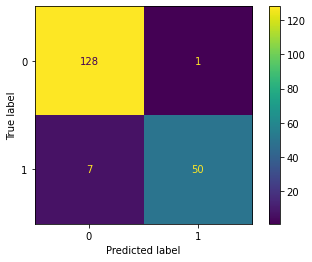

In [1112]:
plot_confusion_matrix(knn, Xz_test, y_test) #confusion matrix

a) I decided to use Logistic Regression and K-Nearest Neighbors to look at the data and predict whether it would be a burger or a pizza. I decided to leave my test size at 0.2, as I felt 20% of the data was enough of a split considering the data set has a good amount of values overall. 

b) The variables I chose to use were "Calories", "Total_Fat", "Cholesterol", "Sodium", "Carbohydrates", "Protein", "Calories_100g", "Total_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g". I felt that they not only could be used in combination to accurately predict whether it is a pizza or a burger due to there prevalence in the dishes, but also that these variables made sense for the prediction for the model. As sugar and dietary fiber, the continuous variables I chose against, had many null and missing values and overall wouldn't have benefitted the prediction overall and the other categorical varibles were descriptions from the original food item. 

c) I decided to z-score all of my continuous variables to make sure that everything was on the same scale to make sure the different measuring scales wouldn't affect the model, as well as to make sure that there was standardization across all of the variables used in the model. 

d) I utilized Train-Test Split for my method of model validation for both the models. I felt that splitting the data into the testing and training sets and not producing k-folds or another method would produce more accurate results faster. As the data set isn't extremely large, a large amount of data won't restrict us from using train-test split and given the prediction methods I used, felt Train-Test Split fit in for these models. 

e) To determine the performance of the models, I looked at the accuracy for each model, shown differently with K-Nearest Neighbors having the knn.score to portray accuracy and the Logistic Regression model has the accuracy score to determine accuracy. When looking at the K-Nearest Neighbors model, the knn.score is .95698, which is a very accurate knn.score for the model. For the Logistic Regression model, the accuracy score was .70967, which is a pretty decent accuracy score for the model. As the accuracy scores go from 0 to 1, a score of .95698 is very high, almost being the most accurate test possible. 

f) Overall, I definitely feel like the K-Nearest Neighbors model was much more successful than the Logistic Regression model. I was able to find this out by looking at the visualization of the confusion matrix, while also producing the accuracy scores (or in the case of K-Nearest Neighbors, knn.score)to put a number to the accuracy. When looking at the accuracy, the K-Nearest Neighbors method had a knn.score of .95698 and had guessed correctly on nearly every part of the confusion matrix, which could be down to the model type of being K-Nearest Nieghbors, as well as having z-scored the variables and set up the testing split at a good size. For the Logistic Regression, having an accuracy score of .70967 is pretty decent, as it shows that it is fairly accurate but isn't nearly as accurate as the K-Nearest Neighbors model. As well, the Logistic Regression's confusion matrix also had a fair amount of wrong predictions given the values, which visually shows that the model isn't as accurate as the K-Nearest Neighbors model.

g) GGPlot is above. 

## 2. Donuts ##

We are looking to use clustering to look into the types of donuts being sold.

#### Let's Look at Our Data ####

In [1113]:
donut = pd.read_csv('/Users/christophergaldi/CPSC392Midterm/KrispyKreme.csv')
donut.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


In [1114]:
donut.shape

(205, 32)

In [1115]:
donut.columns

Index(['Restaurant_Item_Name', 'restaurant', 'Restaurant_ID', 'Item_Name',
       'Item_Description', 'Food_Category', 'Serving_Size',
       'Serving_Size_text', 'Serving_Size_Unit', 'Serving_Size_household',
       'Calories', 'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholesterol',
       'Sodium', 'Potassium', 'Carbohydrates', 'Protein', 'Sugar',
       'Dietary_Fiber', 'Calories_100g', 'Total_Fat_100g',
       'Saturated_Fat_100g', 'Trans_Fat_100g', 'Cholesterol_100g',
       'Sodium_100g', 'Potassium_100g', 'Carbohydrates_100g', 'Protein_100g',
       'Sugar_100g', 'Dietary_Fiber_100g'],
      dtype='object')

In [1116]:
donut.isnull().sum(axis = 0)

Restaurant_Item_Name        0
restaurant                  0
Restaurant_ID               0
Item_Name                   0
Item_Description            0
Food_Category               0
Serving_Size                0
Serving_Size_text         205
Serving_Size_Unit           0
Serving_Size_household    198
Calories                    0
Total_Fat                   0
Saturated_Fat               0
Trans_Fat                   0
Cholesterol                 0
Sodium                      0
Potassium                 166
Carbohydrates               0
Protein                     0
Sugar                       0
Dietary_Fiber              31
Calories_100g               0
Total_Fat_100g              0
Saturated_Fat_100g          0
Trans_Fat_100g              0
Cholesterol_100g            0
Sodium_100g                 0
Potassium_100g            166
Carbohydrates_100g          0
Protein_100g                0
Sugar_100g                  0
Dietary_Fiber_100g         31
dtype: int64

In [1117]:
donut.isnull()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
201,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
202,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
203,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False


### Empirical Model ###

In [1118]:
featuresem = ["Calories", "Sodium", "Carbohydrates", "Sugar", "Calories_100g", "Sodium_100g", "Carbohydrates_100g", "Sugar_100g", "Total_Fat", "Protein", "Total_Fat_100g", "Saturated_Fat_100g", "Protein_100g", "Cholesterol", "Cholesterol_100g", "Saturated_Fat"]

x = donut[featuresem]

z = StandardScaler()

x[featuresem] = z.fit_transform(x)

In [1119]:
EM = GaussianMixture(n_components = 2)
EM.fit(x)

GaussianMixture(n_components=2)

In [1120]:
cluster = EM.predict(x)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [1121]:
silhouette_score(x, cluster)

0.4909904576326476

In [1122]:
EM.predict_proba(x)

array([[0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.0

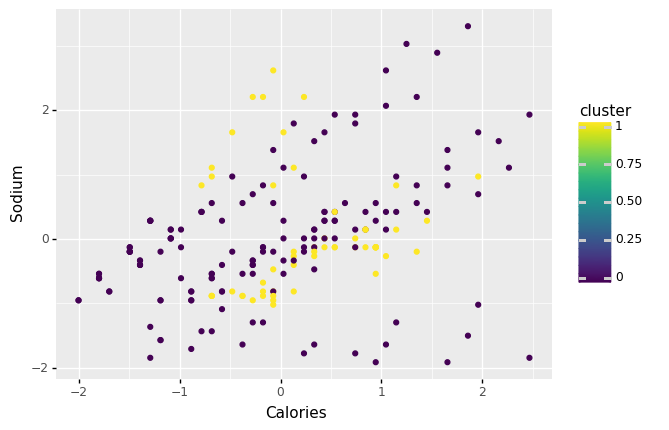

<ggplot: (8789589989636)>

In [1123]:
(ggplot(x, aes(x = "Calories", y = "Sodium", color = "cluster")) + geom_point())

This model looks at Sodium vs Calories.

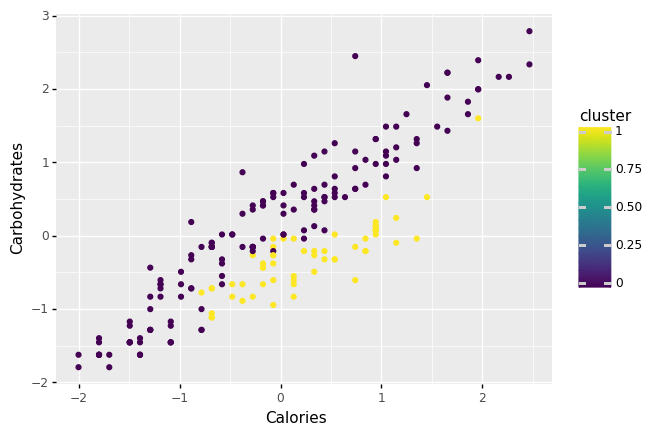

<ggplot: (8789560692468)>

In [1124]:
(ggplot(x, aes(x = "Calories", y = "Carbohydrates", color = "cluster")) + geom_point())

This ggplot looks at Calories vs Carbohydrates. 

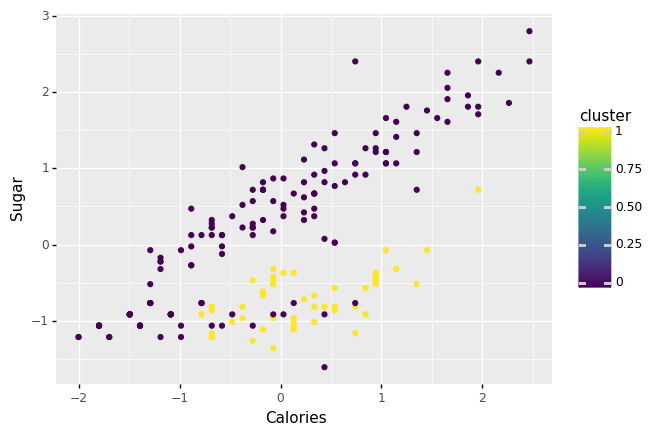

<ggplot: (8789589449659)>

In [1125]:
(ggplot(x, aes(x = "Calories", y = "Sugar", color = "cluster")) + geom_point())

This ggplot looks at Calories vs. Sugar. 

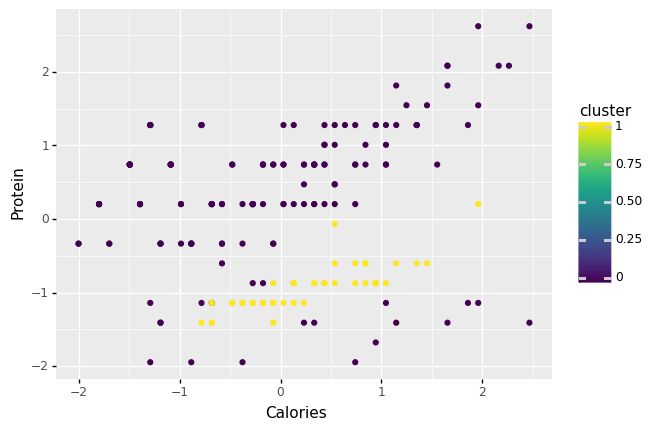

<ggplot: (8789589022221)>

In [1126]:
(ggplot(x, aes(x = "Calories", y = "Protein", color = "cluster")) + geom_point())

This ggplot looks at Calories vs Protein. 

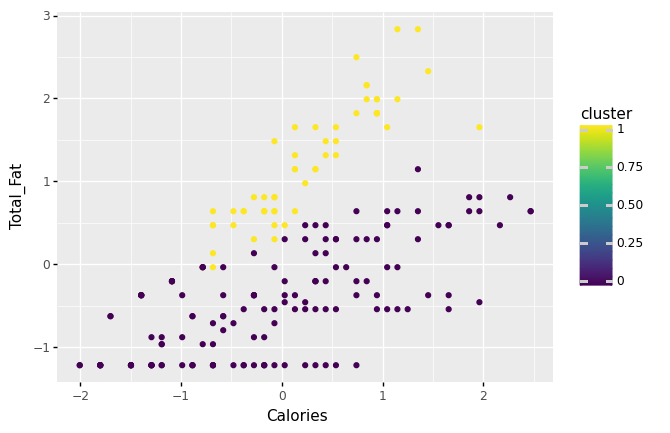

<ggplot: (8789588972987)>

In [1127]:
(ggplot(x, aes(x = "Calories", y = "Total_Fat", color = "cluster")) + geom_point())

This ggplot looks at Calories vs Total_Fat. 

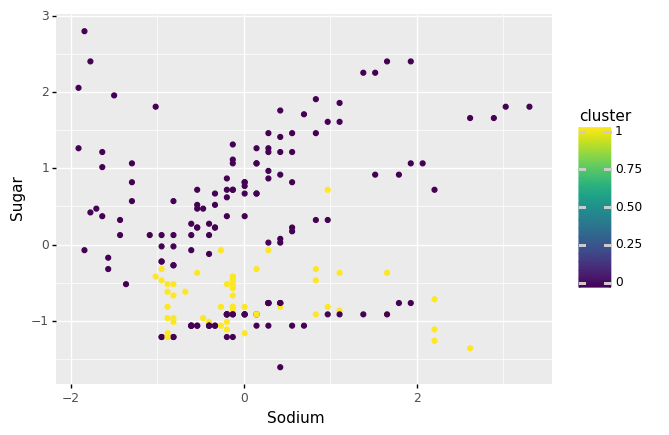

<ggplot: (8789590137573)>

In [1128]:
(ggplot(x, aes(x = "Sodium", y = "Sugar", color = "cluster")) + geom_point())

This ggplot looks at Sodium vs Sugar.

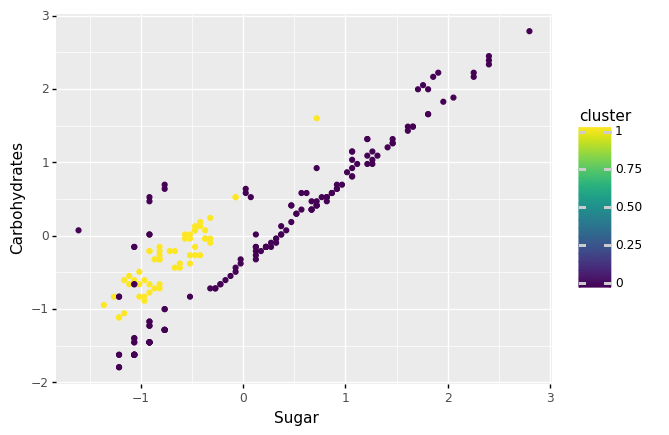

<ggplot: (8789560692240)>

In [1129]:
(ggplot(x, aes(x = "Sugar", y = "Carbohydrates", color = "cluster")) + geom_point())

This ggplot looks at Sugar vs Carbohydrates. 

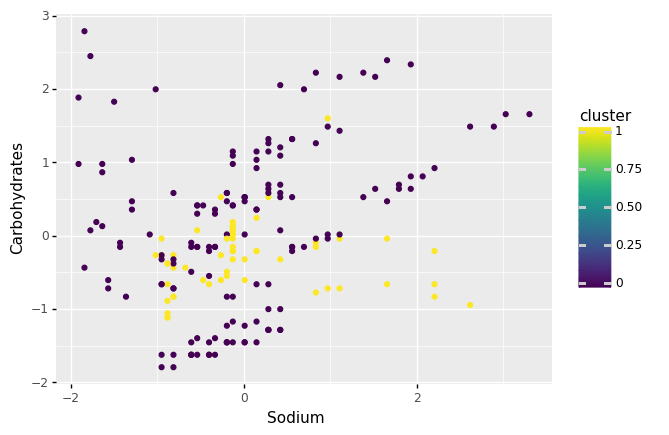

<ggplot: (8789590736972)>

In [1130]:
(ggplot(x, aes(x = "Sodium", y = "Carbohydrates", color = "cluster")) + geom_point())

This ggplot looks at Sodium vs Carbohydrates.

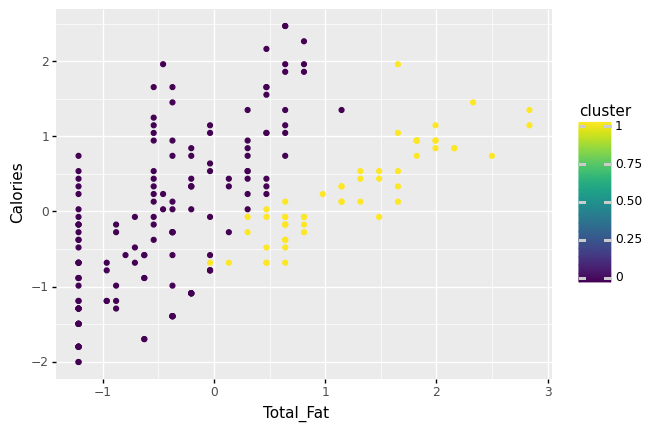

<ggplot: (8789590262215)>

In [1131]:
(ggplot(x, aes(x = "Total_Fat", y = "Calories", color = "cluster")) + geom_point())

This ggplot looks at Total_Fat vs Calories.

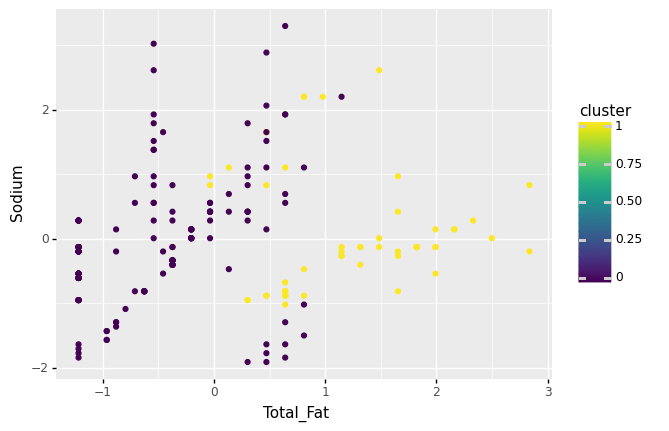

<ggplot: (8789560481371)>

In [1132]:
(ggplot(x, aes(x = "Total_Fat", y = "Sodium", color = "cluster")) + geom_point())

This ggplot looks at Total_Fat vs Sodium.

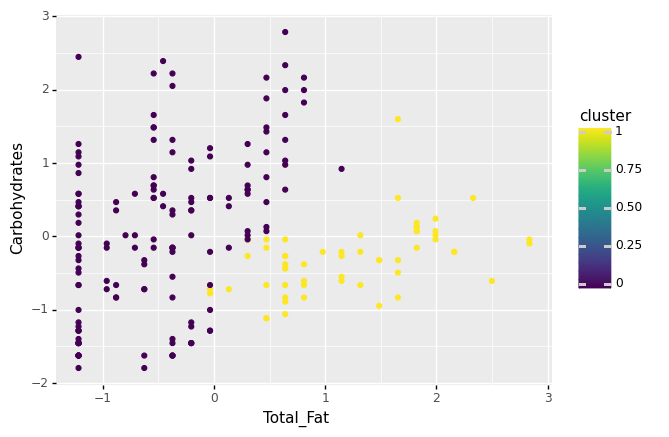

<ggplot: (8789560918053)>

In [1133]:
(ggplot(x, aes(x = "Total_Fat", y = "Carbohydrates", color = "cluster")) + geom_point())

This ggplot looks at Total_Fat vs Carbohydrates

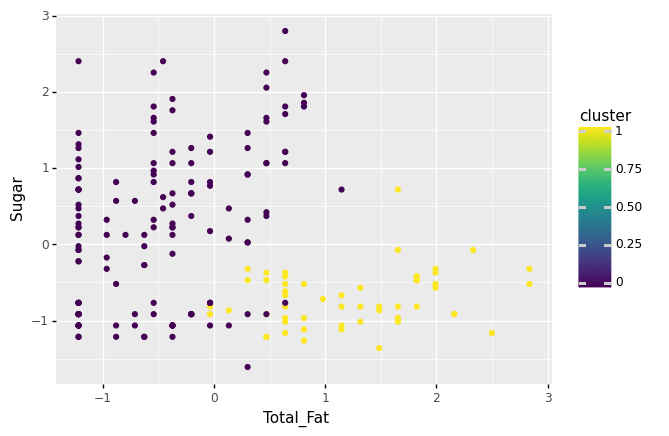

<ggplot: (8789561036876)>

In [1134]:
(ggplot(x, aes(x = "Total_Fat", y = "Sugar", color = "cluster")) + geom_point())

This ggplot looks at Total_Fat vs Sugar.

##### Examining predictors vs the 100 g's of predictor. #####

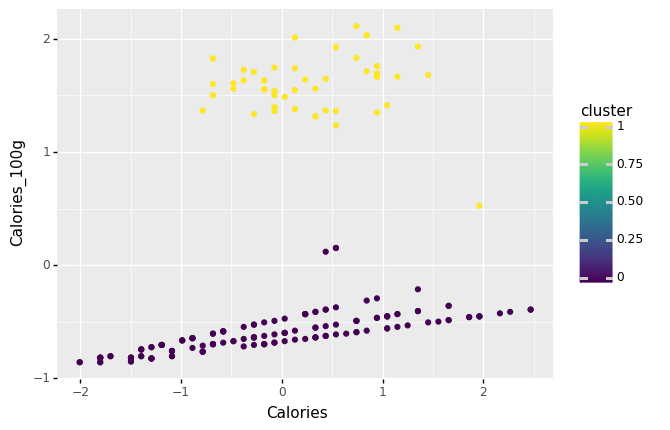

<ggplot: (8789590020425)>

In [1135]:
(ggplot(x, aes(x = "Calories", y = "Calories_100g", color = "cluster")) + geom_point())

This ggplot looks at the Calories vs. Calories_100g, which I wanted to display to show the clusters consistency between the two graphs for calories and calories for 100g. 

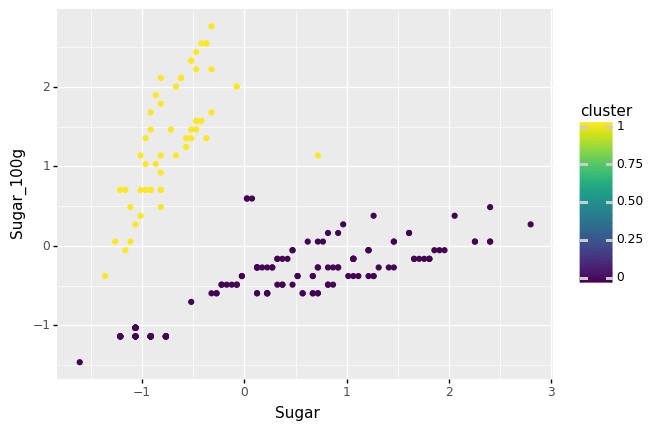

<ggplot: (8789590271543)>

In [1136]:
(ggplot(x, aes(x = "Sugar", y = "Sugar_100g", color = "cluster")) + geom_point())

This ggplot looks at the Sugar vs. Sugars_100g, which I wanted to display to show the clusters consistency between the two graphs for sugar and sugar for 100g.

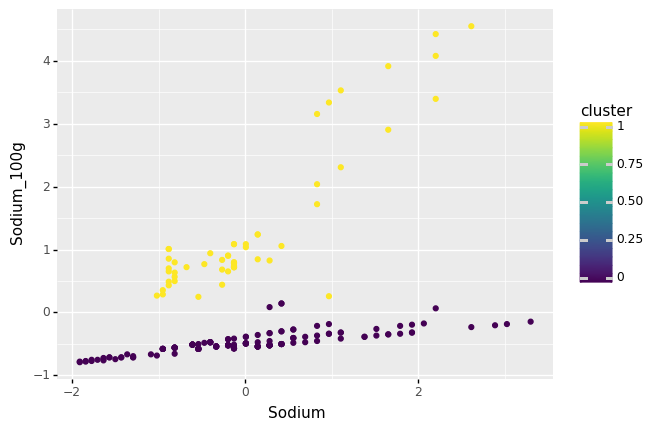

<ggplot: (8789561008628)>

In [1137]:
(ggplot(x, aes(x = "Sodium", y = "Sodium_100g", color = "cluster")) + geom_point())

This ggplot looks at the Sodium vs. Sodium_100g, which I wanted to display to show the clusters consistency between the two graphs for sodium and sodium for 100g.

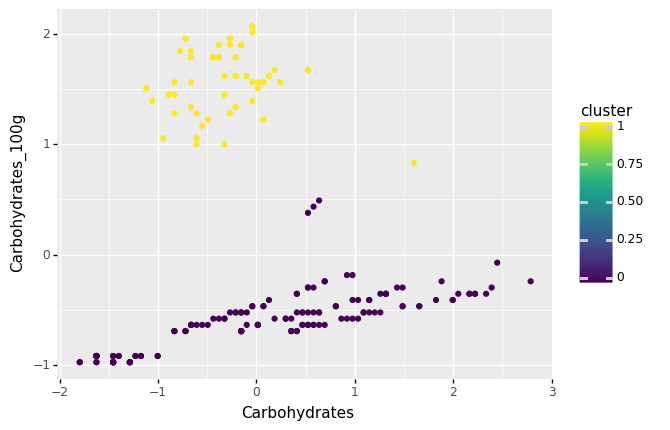

<ggplot: (8789560152230)>

In [1138]:
(ggplot(x, aes(x = "Carbohydrates", y = "Carbohydrates_100g", color = "cluster")) + geom_point())

This ggplot looks at the Carbohydrates vs. Carbohydrates_100g, which I wanted to display to show the clusters consistency between the two graphs for carbohydrates and carbohydrates for 100g.

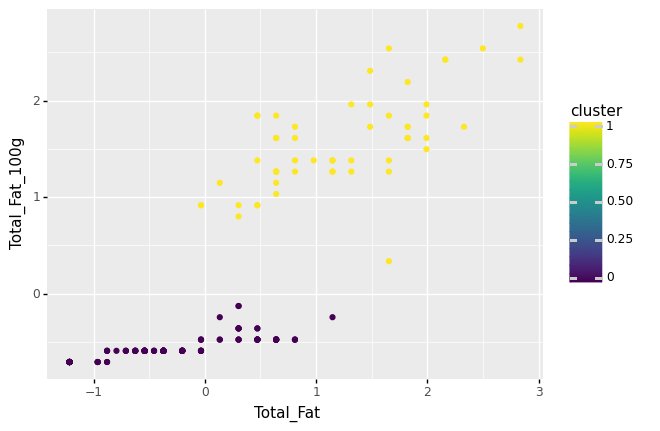

<ggplot: (8789590767243)>

In [1139]:
(ggplot(x, aes(x = "Total_Fat", y = "Total_Fat_100g", color = "cluster")) + geom_point())

This ggplot looks at the Total_Fat vs. Total_Fat_100g, which I wanted to display to show the clusters consistency between the two graphs.

#### Let's Look at Our Data Again ####

In [1140]:
donut2 = pd.read_csv('/Users/christophergaldi/CPSC392Midterm/KrispyKreme.csv')
donut2.head()

,Restaurant_Item_Name,restaurant,Restaurant_ID,Item_Name,Item_Description,Food_Category,Serving_Size,Serving_Size_text,Serving_Size_Unit,Serving_Size_household,...,Total_Fat_100g,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g
0,Krispy Kreme Apple Fritter,Krispy Kreme,49,Apple Fritter,"Apple Fritter, Doughnuts",Baked Goods,100,NaN,g,NaN,...,19,9,0,0,110,45.0,42,4,26,1.0
1,Krispy Kreme Chocolate Iced Cake Doughnut,Krispy Kreme,49,Chocolate Iced Cake Doughnut,"Chocolate Iced Cake Doughnut, Doughnuts",Baked Goods,71,NaN,g,NaN,...,18,7,0,35,437,49.0,52,4,27,NaN
2,Krispy Kreme Chocolate Iced Custard Filled Dou...,Krispy Kreme,49,Chocolate Iced Custard Filled Doughnut,"Chocolate Iced Custard Filled Doughnut, Doughnuts",Baked Goods,85,NaN,g,NaN,...,18,8,0,0,165,59.0,44,5,20,1.0
3,Krispy Kreme Chocolate Iced Glazed Doughnut,Krispy Kreme,49,Chocolate Iced Glazed Doughnut,"Chocolate Iced Glazed Doughnut, Doughnuts",Baked Goods,63,NaN,g,NaN,...,17,8,0,0,143,56.0,52,5,32,NaN
4,Krispy Kreme Chocolate Iced Glazed Cruller Dou...,Krispy Kreme,49,Chocolate Iced Glazed Cruller Doughnut,"Chocolate Iced Glazed Cruller Doughnut, Doughnuts",Baked Goods,70,NaN,g,NaN,...,14,6,0,29,386,29.0,57,4,37,NaN


In [1141]:
donut2.isnull().sum(axis = 0)

Restaurant_Item_Name        0
restaurant                  0
Restaurant_ID               0
Item_Name                   0
Item_Description            0
Food_Category               0
Serving_Size                0
Serving_Size_text         205
Serving_Size_Unit           0
Serving_Size_household    198
Calories                    0
Total_Fat                   0
Saturated_Fat               0
Trans_Fat                   0
Cholesterol                 0
Sodium                      0
Potassium                 166
Carbohydrates               0
Protein                     0
Sugar                       0
Dietary_Fiber              31
Calories_100g               0
Total_Fat_100g              0
Saturated_Fat_100g          0
Trans_Fat_100g              0
Cholesterol_100g            0
Sodium_100g                 0
Potassium_100g            166
Carbohydrates_100g          0
Protein_100g                0
Sugar_100g                  0
Dietary_Fiber_100g         31
dtype: int64

### Hierarchal Agglomerative Clustering ###

In [1142]:
hac_features = ["Calories", "Sodium", "Carbohydrates", "Sugar", "Calories_100g", "Sodium_100g", "Carbohydrates_100g", "Sugar_100g", "Total_Fat", "Protein", "Total_Fat_100g", "Saturated_Fat_100g", "Protein_100g", "Cholesterol", "Cholesterol_100g", "Saturated_Fat"]

x = donut2[hac_features]

z = StandardScaler()

x[hac_features] = z.fit_transform(x)

hac = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")

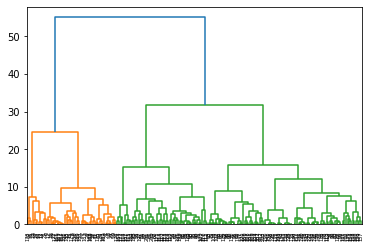

In [1143]:
hac.fit(x)

dendro = sch.dendrogram(sch.linkage(x, method = "ward", metric = "euclidean"))


In [1144]:
membership = hac.labels_
membership

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [1145]:
silhouette_score(x, membership)

0.4910713010266338

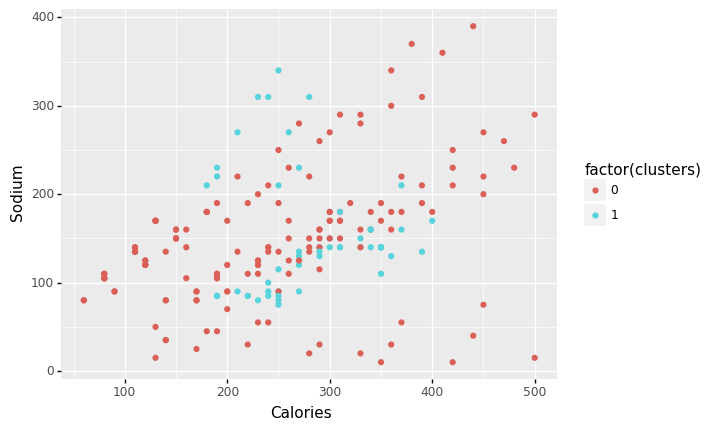

<ggplot: (8789564213577)>

In [1146]:
donut2["clusters"] = membership

(ggplot(donut2, aes(x = "Calories", y = "Sodium", color = "factor(clusters)")) + geom_point())

This model looks at Sodium vs Calories. When looking at both of the models, they both are similar in structure for both clusters.

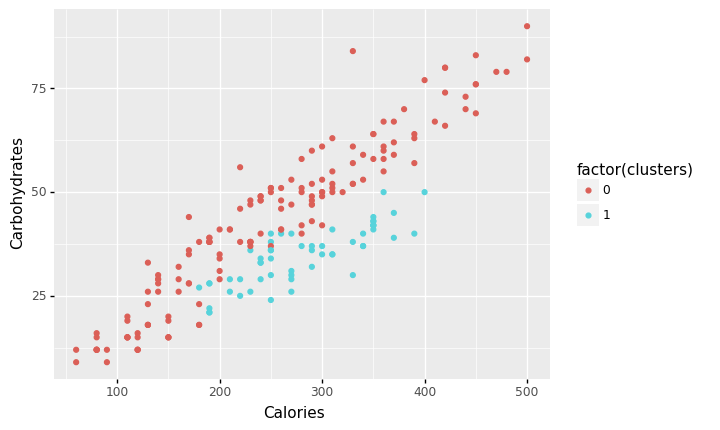

<ggplot: (8789590012579)>

In [1147]:
(ggplot(donut2, aes(x = "Calories", y = "Carbohydrates", color = "factor(clusters)")) + geom_point())

This ggplot looks at Calories vs Carbohydrates. The clusters and the ggplot are almost identical between the two methods, with both showing the same positive relationship and having close clustering between each point. 

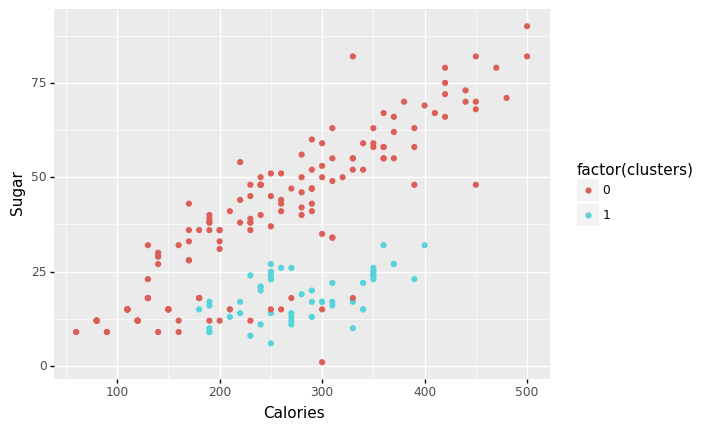

<ggplot: (8789590012510)>

In [1148]:
(ggplot(donut2, aes(x = "Calories", y = "Sugar", color = "factor(clusters)")) + geom_point())

This ggplot looks at Calories vs. Sugar. The two ggplots are very similar in their structure and where the data points are. 

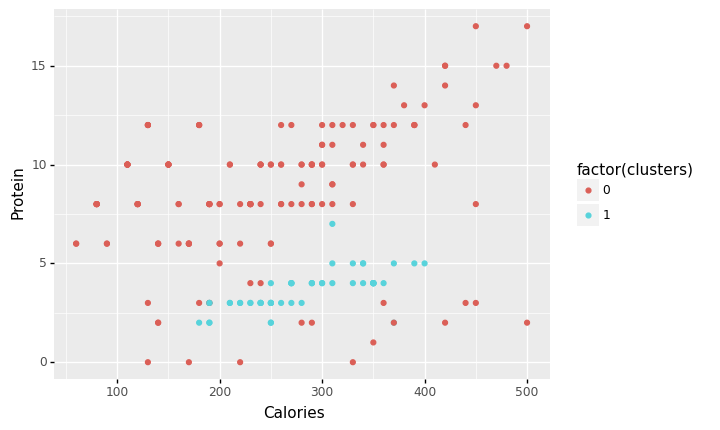

<ggplot: (8789561192584)>

In [1149]:
(ggplot(donut2, aes(x = "Calories", y = "Protein", color = "factor(clusters)")) + geom_point())

This ggplot looks at Calories vs Protein. The two ggplots are very similar in structure and where the data poitns are located. 

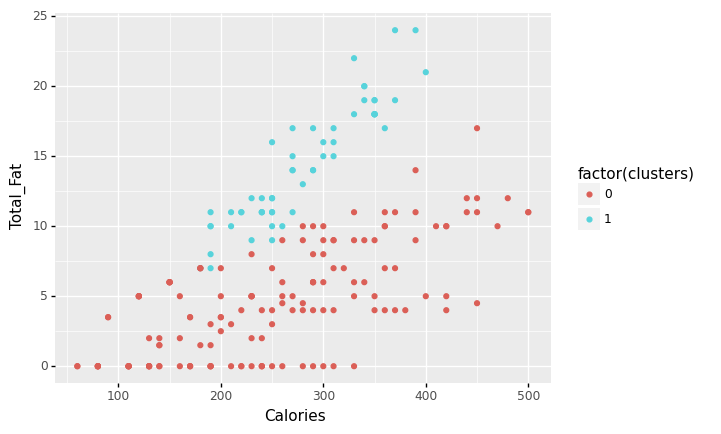

<ggplot: (8789564415775)>

In [1150]:
(ggplot(donut2, aes(x = "Calories", y = "Total_Fat", color = "factor(clusters)")) + geom_point())

This ggplot looks at Calories vs Total Fat. The two ggplots are similar.

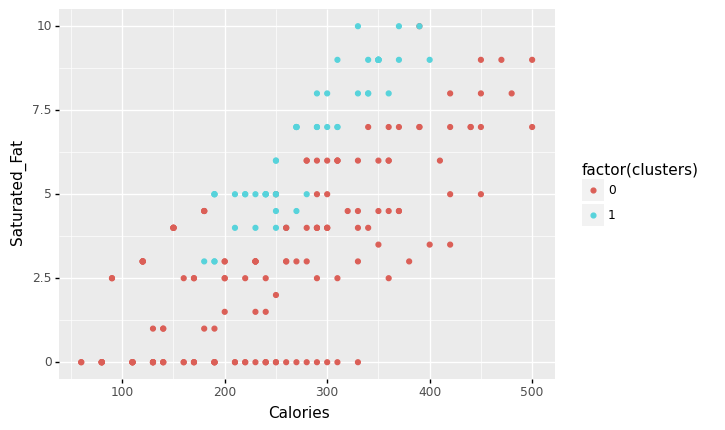

<ggplot: (8789561073773)>

In [1151]:
(ggplot(donut2, aes(x = "Calories", y = "Saturated_Fat", color = "factor(clusters)")) + geom_point())

This ggplot looks at Calories vs Saturated Fat.

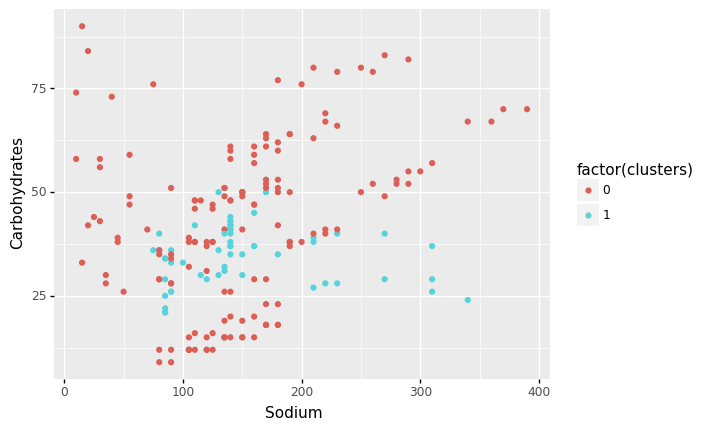

<ggplot: (8789561092127)>

In [1152]:
(ggplot(donut2, aes(x = "Sodium", y = "Carbohydrates", color = "factor(clusters)")) + geom_point())

This ggplot looks at Sodium vs Carbohydrates

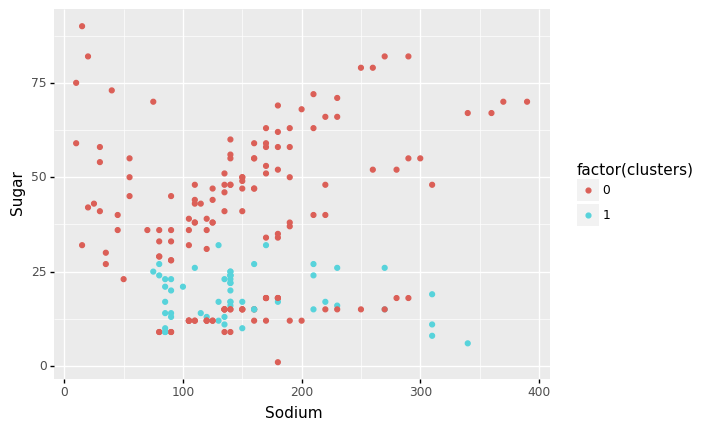

<ggplot: (8789561086215)>

In [1153]:
(ggplot(donut2, aes(x = "Sodium", y = "Sugar", color = "factor(clusters)")) + geom_point())

This ggplot looks at Sodium vs Sugar.

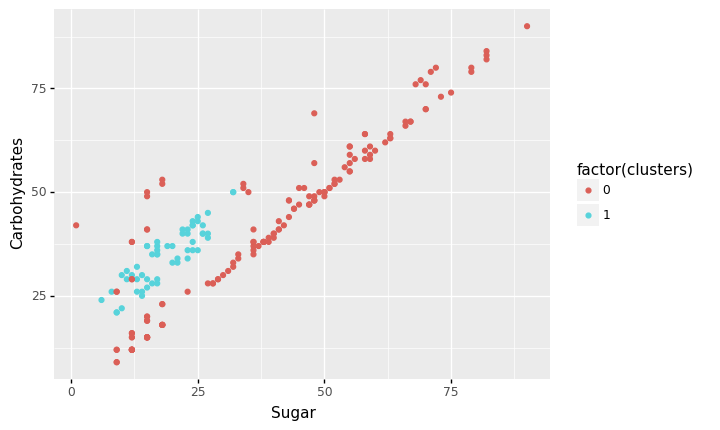

<ggplot: (8789560549852)>

In [1154]:
(ggplot(donut2, aes(x = "Sugar", y = "Carbohydrates", color = "factor(clusters)")) + geom_point())

This ggplot looks at Sugar vs. Carbohydrates.

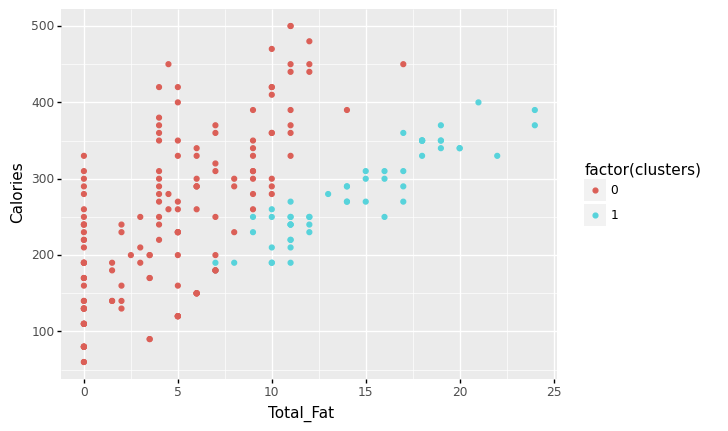

<ggplot: (8789561088946)>

In [1155]:
(ggplot(donut2, aes(x = "Total_Fat", y = "Calories", color = "factor(clusters)")) + geom_point())

This ggplot looks at Total_Fat vs Calories.

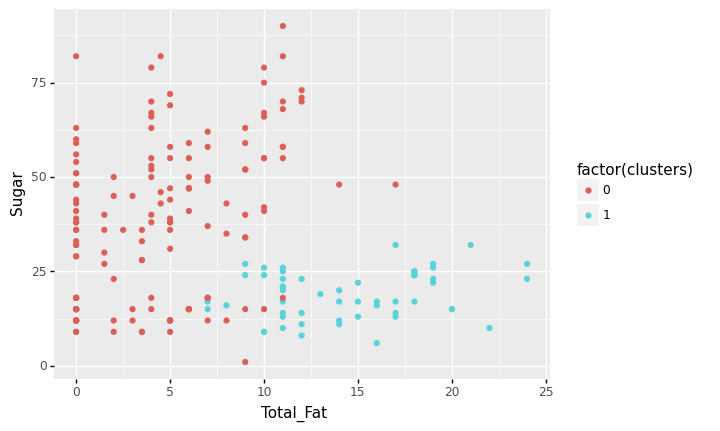

<ggplot: (8789589617671)>

In [1156]:
(ggplot(donut2, aes(x = "Total_Fat", y = "Sugar", color = "factor(clusters)")) + geom_point())

This ggplot looks at Total_Fat vs Sugar.

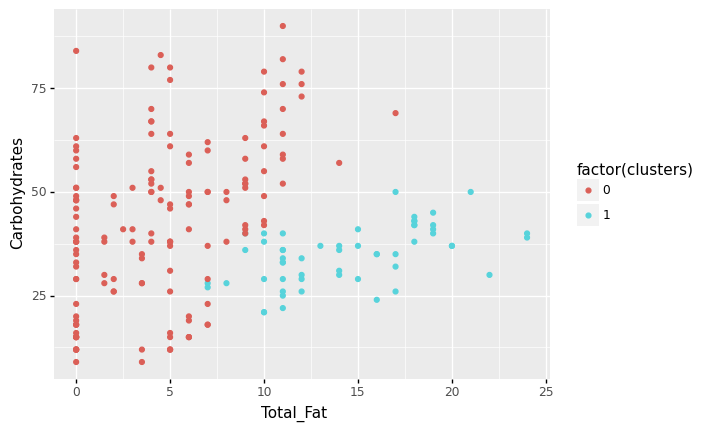

<ggplot: (8789591805278)>

In [1157]:
(ggplot(donut2, aes(x = "Total_Fat", y = "Carbohydrates", color = "factor(clusters)")) + geom_point())

This ggplot looks at Total_Fat vs. Carbohydrates. 

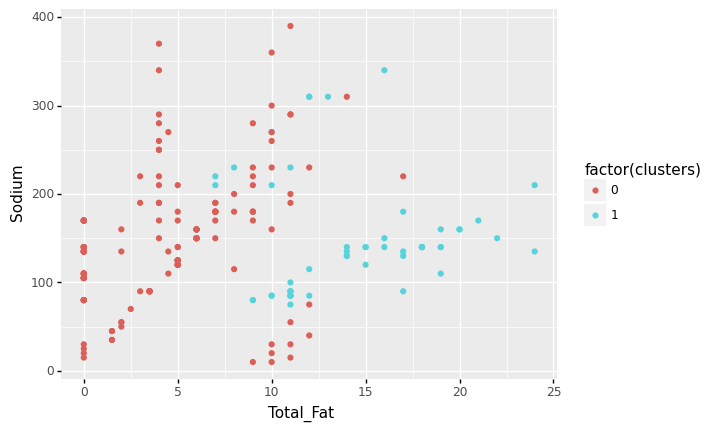

<ggplot: (8789560982251)>

In [1158]:
(ggplot(donut2, aes(x = "Total_Fat", y = "Sodium", color = "factor(clusters)")) + geom_point())

This ggplot looks at Total_Fat vs Sodium. 

##### Examining predictors vs the 100 g's of predictor. #####

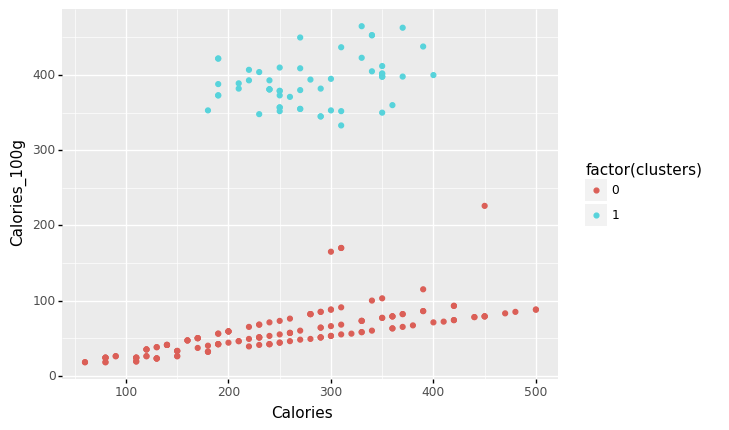

<ggplot: (8789591805251)>

In [1159]:
(ggplot(donut2, aes(x = "Calories", y = "Calories_100g", color = "factor(clusters)")) + geom_point())

This ggplot looks at the Calories vs. Calories_100g, which I wanted to display to show the clusters consistency between the two graphs for calories and calories for 100g. 

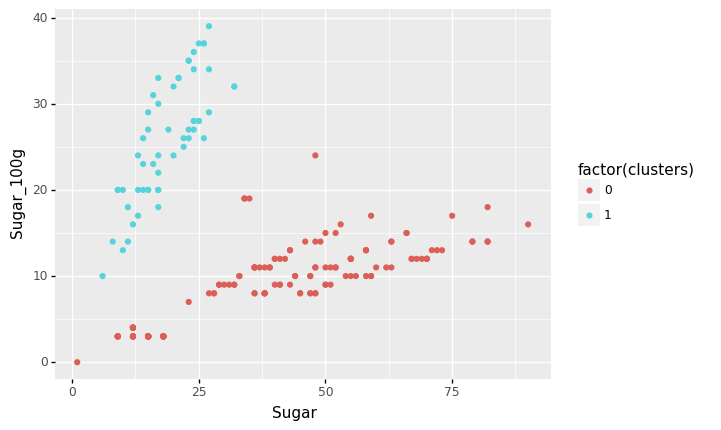

<ggplot: (8789590262176)>

In [1160]:
(ggplot(donut2, aes(x = "Sugar", y = "Sugar_100g", color = "factor(clusters)")) + geom_point())

This ggplot looks at the Sugar vs. Sugars_100g, which I wanted to display to show the clusters consistency between the two graphs for sugar and sugar for 100g.

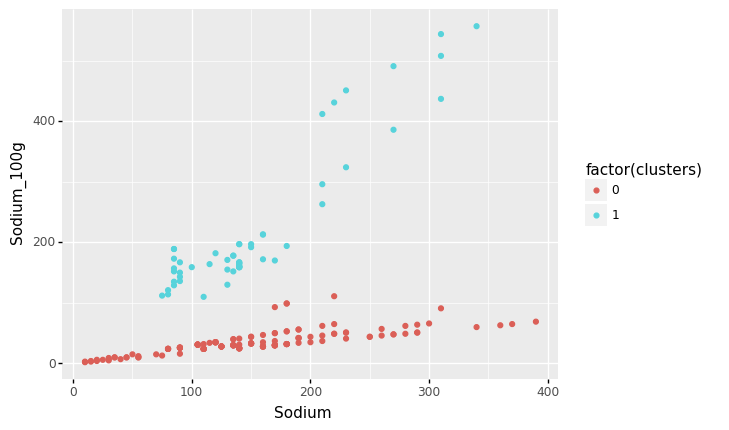

<ggplot: (8789564155573)>

In [1161]:
(ggplot(donut2, aes(x = "Sodium", y = "Sodium_100g", color = "factor(clusters)")) + geom_point())

This ggplot looks at the Sodium vs. Sodium_100g, which I wanted to display to show the clusters consistency between the two graphs for sodium and sodium for 100g.

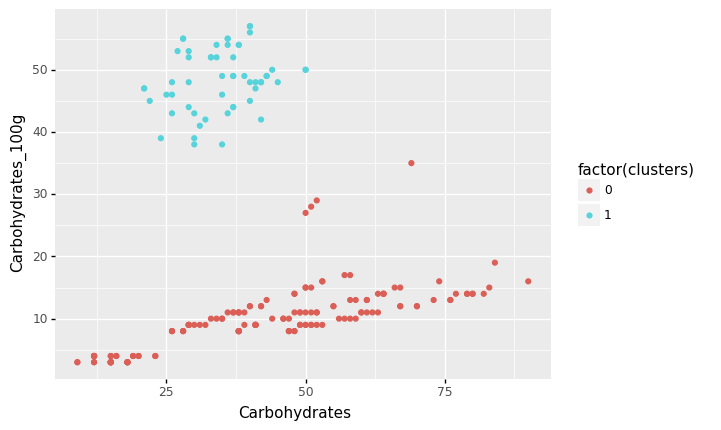

<ggplot: (8789589623848)>

In [1162]:
(ggplot(donut2, aes(x = "Carbohydrates", y = "Carbohydrates_100g", color = "factor(clusters)")) + geom_point())

This ggplot looks at the Carbohydrates vs. Carbohydrates_100g, which I wanted to display to show the clusters consistency between the two graphs for carbohydrates and carbohydrates for 100g.

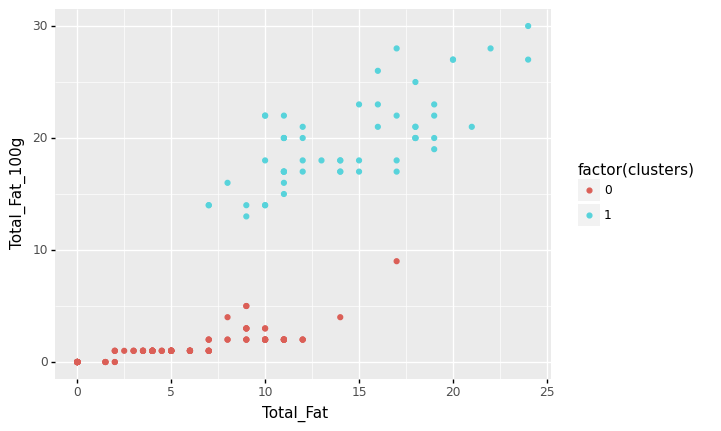

<ggplot: (8789589272528)>

In [1163]:
(ggplot(donut2, aes(x = "Total_Fat", y = "Total_Fat_100g", color = "factor(clusters)")) + geom_point())

This ggplot looks at the Total_Fat vs. Total_Fat_100g, which I wanted to display to show the clusters consistency between the two graphs for total fat and total fat for 100g.

a) The two algorithms I used were the Empirical (Gaussian) Method and the Hierarchal Agglomerative Clustering. I chose the Empirical (Gaussian) Method takes into account variance, which I felt was helpful when trying to cluster the Donuts. I decided to use the Hiearchal Agglomerative Clustering method in an attempt to analyze the hierarchal relationship for the data, and how the clustering  

b) I chose the predictors "Calories", "Sodium", "Carbohydrates", "Sugar", "Calories_100g", "Sodium_100g", "Carbohydrates_100g", "Sugar_100g", "Total_Fat", "Protein", "Total_Fat_100g", "Saturated_Fat_100g", "Protein_100g", "Cholesterol", "Cholesterol_100g", "Saturated_Fat" because I felt that not only that they could be accurately used to classify the donuts, but also not the others due to the data either being categorical or descriptions, or that the data was not needed to predict the data. Looking at the predictors, I felt it was important to look at both the #100g and the standard value, as they are on different scales and could help further predict how the clustering would be. 

c) I decided to z-score my variables because of the introduction of the #100g predictors and the average amount of grams per each of Sodium, Carbohydrates, etc. would be a lot larger of a number on average then a Saturated_Fat or Protein for donuts. I felt that z-scoring would enable everything to be on the same scale, enabling the model to give more accurate due to taking into account the varying number that each individual donut would have. 

d) Based on the silhouette scores from the above models, we can see that both models produced nearly the same silhouette scores with the same number of clusters, that being 2 clusters. The silhouette score produced for the Empirical Modeling was 0.499090 while the HAC produced a silhouette score of .491071. This means that the Empirical Modeling method produced a slightly better silhouette score when compared to the HAC, meanign overall that the Empirical Modeling method was a slightly better method to attempt to cluster these donuts. 

e) Overall, the models performed fairly decent, with the silhouette scores indicating how well each model fit to the data. Given that the Empirical Modeling method had the highest silhouette score of 0.499090, we know that the Empirical Model fit the data and performed slightly better than the HAC, which was a .491071. Overall though, a silhouette score around .5 indicates that the model's performance was decent, as the optimal silhouette score is 1, with a range from -1 to 1. 

f) When looking at the two models and the accompanying visualizations, you can see that the models' clusters are very similar, with each plot showing that the shape and structure of the graph are identical, with a few individual points being in varying arrays for both clusters. Overall, we can say that, since their structure is the same and taking into account some variance, both models' clusters help a consistent structure and relationship in both models for their predictors. 

g) By creating ggplots for each model, which are all above, I was able to look at the structure and location for the data points for each of the models and the predictors to examine their relation to the cluster. All of the ggplots were relatively similar in structure, shape, and location of data points, which shows that the models, while having some difference, fit the model very similarly. 

h)
Cluster 0, when comparing to Cluster 1, had a higher average for sugar, and carbs, while having slightly more calories and sodium on average. This cluster has a lot of higher values for the predictors, as well as having a few outliers for sugar and carbohydrates. Cluster 0 could represent the donuts that are "specialties", donuts that have extra items on top of the donut or intricate icings or filings, such as holiday specialties donuts or creme-filled, which would explain the overall higher average in the sugar and carbohydrates as items like sprinkles or jelly would increase the  This cluster varies in 

Cluster 1, when compared to Cluster 0, had a slightly higher average for total fat, but otherwise was fairly consistent as a cluster for sugar, carbohydrates, calories, and sodium. Cluster 1 did lack in sugar, carbohydrates, and slightly in calories and sodium. Cluster 1 could represent the donuts that are plain, lacking variety or extra toppings, such as glazed or cake doughnuts, ones that don't have many flashy extras on top of the goodness of the donut. 